In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


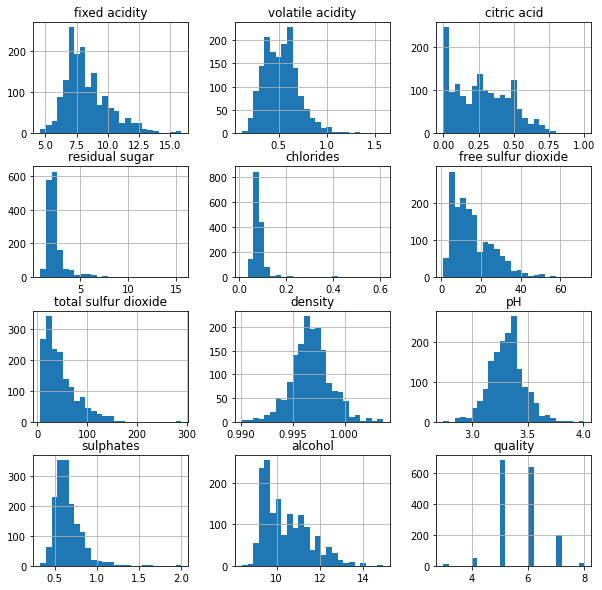

In [6]:
df.hist(bins = 25,figsize = (10,10))
plt.show()

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Let's find the correlation using heat map now.

<AxesSubplot:>

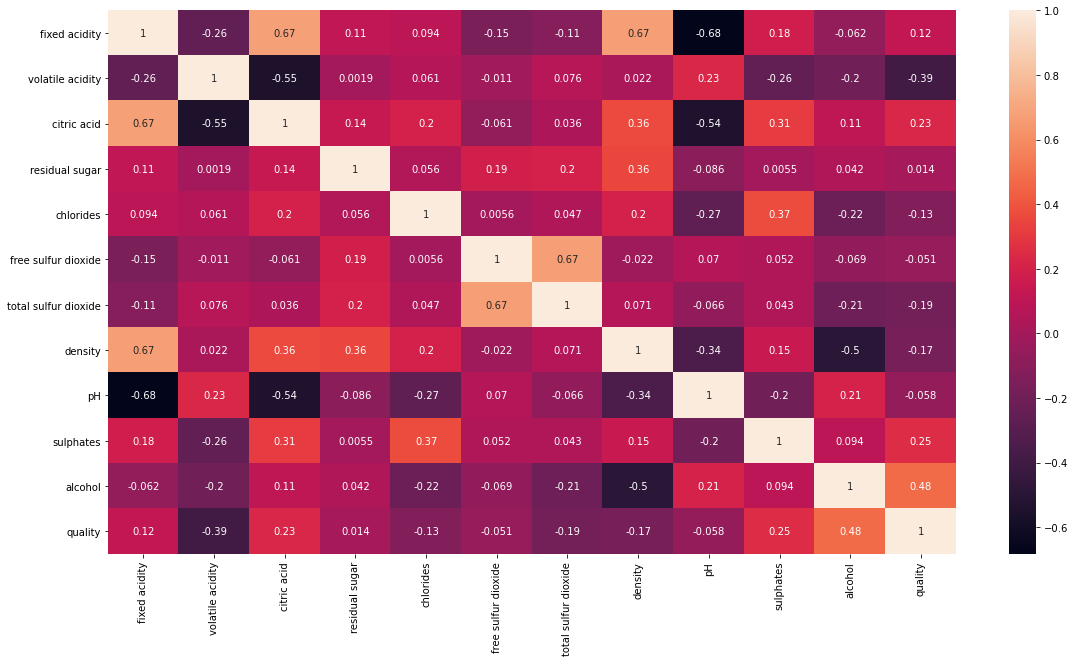

In [8]:
plt.figure(figsize=[19,10])
sns.heatmap(df.corr(),annot = True)

From the above we find those features that are fully correlated to each other by this we reduce the number of features from the data which does not show any relation.

Count the target variable now.

<AxesSubplot:xlabel='quality', ylabel='count'>

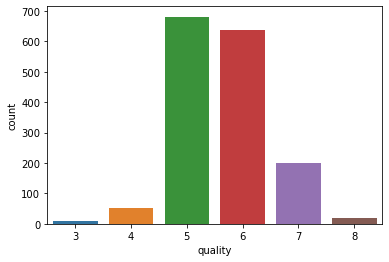

In [10]:
sns.countplot(x='quality', data = df)

Plotting box plot to check outliers.

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

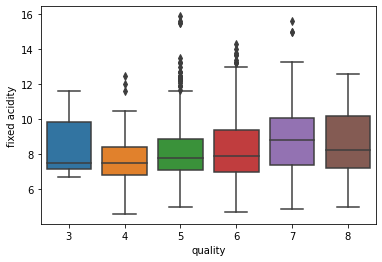

In [14]:
sns.boxplot('quality' , 'fixed acidity' , data = df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

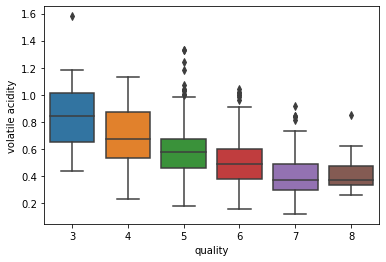

In [15]:
sns.boxplot('quality' , 'volatile acidity' , data = df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

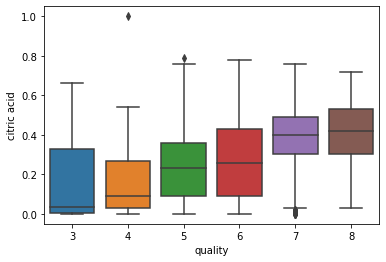

In [16]:
sns.boxplot('quality' , 'citric acid' , data = df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

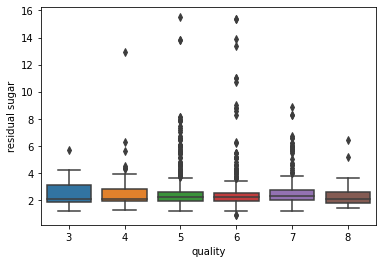

In [17]:
sns.boxplot('quality' , 'residual sugar' , data = df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

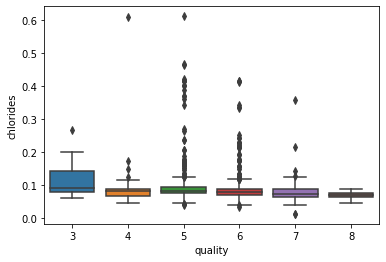

In [18]:
sns.boxplot('quality' , 'chlorides' , data = df)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

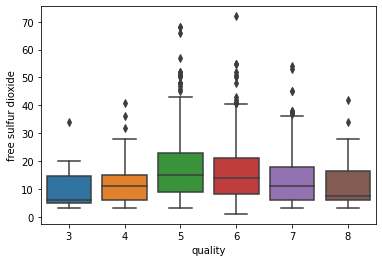

In [19]:
sns.boxplot('quality' , 'free sulfur dioxide' , data = df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

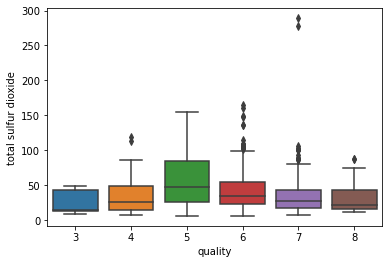

In [20]:
sns.boxplot('quality' , 'total sulfur dioxide' , data = df)

<AxesSubplot:xlabel='quality', ylabel='density'>

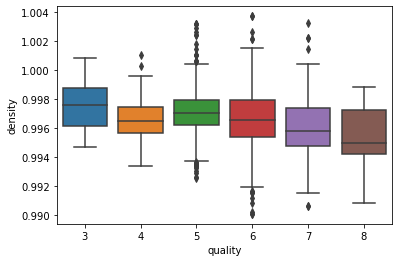

In [21]:
sns.boxplot('quality' , 'density' , data = df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

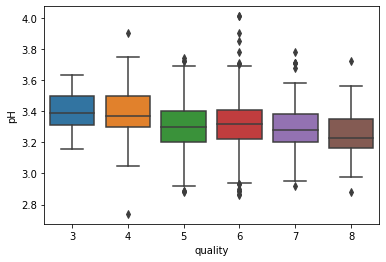

In [22]:
sns.boxplot('quality' , 'pH' , data = df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

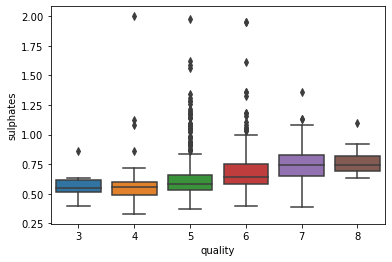

In [23]:
sns.boxplot('quality' , 'sulphates' , data = df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

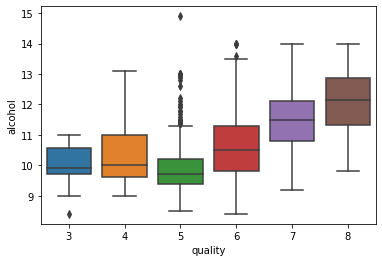

In [24]:
sns.boxplot('quality' , 'alcohol' , data = df)

From above box plots we observed that are some column that contains outliers.

Now we will create new column which contains the reviews of the quality of wine.

In [27]:
reviews = []
for i in df['quality']:
    if i >= 1 and i <= 7:
        reviews.append('0')
    else:
        reviews.append('1')
df['Reviews'] = reviews

In [29]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Reviews'],
      dtype='object')

We have to check the balancing of data.

In [31]:
from collections import Counter

Counter(df['Reviews'])

Counter({'0': 1581, '1': 18})

This shows our data is imbalance so we have to fit the data.

Now we will split the variables.

In [33]:
x = df.iloc[:,:11]
y = df['Reviews']

In [34]:
x.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


In [35]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Reviews, dtype: object

Now we will scale the data using StandardScalar for PCA.

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [37]:
print(x)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [38]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

Now to see the principle components we have to plot a graph.

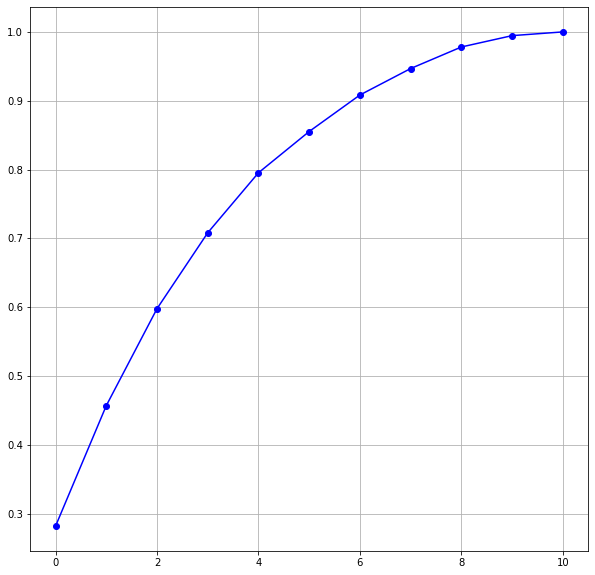

In [41]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), "bo-")
plt.grid()

Looking at graph we can observe that 8 principal components attribute have 90% of variation in the data. 

Now we can pick the 8 principal components for prediction.

In [42]:
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(x)

In [43]:
print(x_new)

[[-1.61952988  0.45095009 -1.77445415 ... -0.91392069 -0.16104319
  -0.28225828]
 [-0.79916993  1.85655306 -0.91169017 ...  0.92971392 -1.00982858
   0.76258697]
 [-0.74847909  0.88203886 -1.17139423 ...  0.40147313 -0.53955348
   0.59794606]
 ...
 [-1.45612897  0.31174559  1.12423941 ... -0.50640956 -0.23108221
   0.07938219]
 [-2.27051793  0.97979111  0.62796456 ... -0.86040762 -0.32148695
  -0.46887589]
 [-0.42697475 -0.53669021  1.6289552  ... -0.49615364  1.18913227
   0.04217568]]


Split the data into train test data.

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.25)

In [47]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1199, 8)
(1199,)
(400, 8)
(400,)


In [ ]:
Finding best model

1.Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr = LogisticRegression()
lr.fit(x_train, y_train)
lrpred = lr.predict(x_test)
print(accuracy_score(y_test,lrpred)*100)
print(confusion_matrix(y_test,lrpred))
print(classification_report(y_test,lrpred))

98.25
[[393   2]
 [  5   0]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       395
           1       0.00      0.00      0.00         5

    accuracy                           0.98       400
   macro avg       0.49      0.50      0.50       400
weighted avg       0.98      0.98      0.98       400



We get accuracy score of 98.25% with LogisticRegression.

2.RandomForestClassifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
rnd = RandomForestClassifier()

fit_rnd = rnd.fit(x_train, y_train)
rnd_score = rnd.score(x_test,y_test)
rndpred = rnd.predict(x_test)
print(accuracy_score(y_test,rndpred)*100)
print(confusion_matrix(y_test,rndpred))
print(classification_report(y_test,rndpred))

99.0
[[395   0]
 [  4   1]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       395
           1       1.00      0.20      0.33         5

    accuracy                           0.99       400
   macro avg       0.99      0.60      0.66       400
weighted avg       0.99      0.99      0.99       400



We get accuracy score of 99% with LogisticRegression.

3.Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
fit_dt = dt.fit(x_train, y_train)
dt_score = dt.score(x_test,y_test)
dtpred = dt.predict(x_test)
print(accuracy_score(y_test,dtpred)*100)
print(confusion_matrix(y_test,dtpred))
print(classification_report(y_test,dtpred))

97.75
[[389   6]
 [  3   2]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       395
           1       0.25      0.40      0.31         5

    accuracy                           0.98       400
   macro avg       0.62      0.69      0.65       400
weighted avg       0.98      0.98      0.98       400



We get accuracy score of 97.75% with Decision Tree.

4.SVM

In [55]:
from sklearn.svm import SVC
svc = SVC()
fit_svc = svc.fit(x_train, y_train)
svc_score = svc.score(x_test,y_test)
svcpred = svc.predict(x_test)
print(accuracy_score(y_test,svcpred)*100)
print(confusion_matrix(y_test,svcpred))
print(classification_report(y_test,svcpred))

98.75
[[395   0]
 [  5   0]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       395
           1       0.00      0.00      0.00         5

    accuracy                           0.99       400
   macro avg       0.49      0.50      0.50       400
weighted avg       0.98      0.99      0.98       400



We get accuracy score of 97.75% with SVM.

Now finding the best model amongst all 4.

In [57]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(lr, x, y, cv=5)
print("Cross validation score of LogisticsRegression model :",scr.mean())

Cross validation score of LogisticsRegression model : 0.9887441222570533


In [58]:
scr = cross_val_score(rnd, x, y, cv=5)
print("Cross validation score of RandomForestClassifier model :",scr.mean())

Cross validation score of RandomForestClassifier model : 0.9899941222570533


In [59]:
scr = cross_val_score(dt, x, y, cv=5)
print("Cross validation score of Decision Tree model :",scr.mean())

Cross validation score of Decision Tree model : 0.9743632445141065


In [60]:
scr = cross_val_score(svc, x, y, cv=5)
print("Cross validation score of SVC model :",scr.mean())

Cross validation score of SVC model : 0.9887441222570533


Minimum difference in accuracy and cross validation is for RadomForestClassifier so this is our best model.

Hyper parameter tuning

In [61]:
from sklearn.model_selection import GridSearchCV

parameters = {"n_estimators" : [200,700],
               "max_features" : ["auto" , "sqrt" , "log2"],
              "max_depth" : [4,5,6,7,8],
              "criterion": ["gini","entropy"]}

In [62]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [63]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [64]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [65]:
mod = RandomForestClassifier(criterion = 'gini',max_depth = 4 , max_features = 'auto', n_estimators = 200)

mod.fit(x_train,y_train)
pred = mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

98.75


Plotting roc curve.

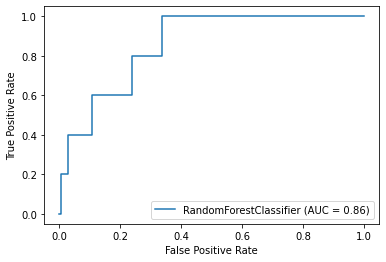

In [66]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(mod,x_test,y_test)

Saving the best model

In [67]:
import joblib
joblib.dump(mod,'WineQualityProject.pk1')

['WineQualityProject.pk1']